# Feature Selection for Linear Regression

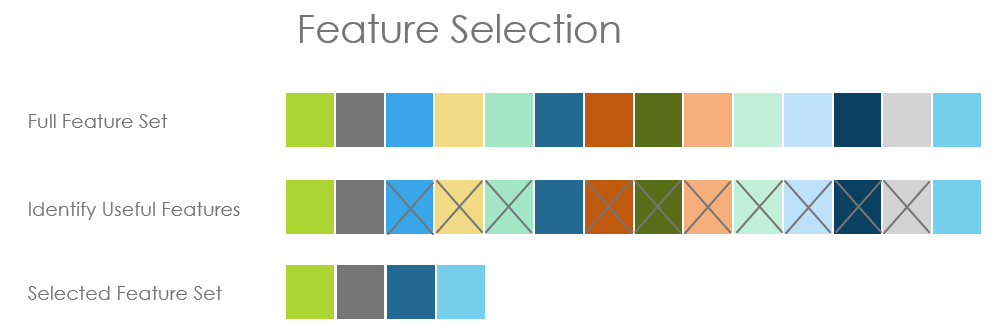

Feature selection is a process where you automatically select those features in your data that contribute most to the prediction variable or output in which you are interested.

Having irrelevant features in your data can decrease the accuracy of many models, especially linear algorithms like linear and logistic regression.

Three benefits of performing feature selection before modeling your data are:

    - Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
    - Improves Accuracy: Less misleading data means modeling accuracy improves.
    - Reduces Training Time: Less data means that algorithms train faster.


Feature selection can be done in multiple ways but there are broadly 3 categories of it:
- **Filter Method**- you filter and take only the subset of the relevant features.
- **Wrapper Method**- you feed the features to the selected Machine Learning algorithm and based on the model performance you add/remove the features.
    - RFE
- **Embedded Method**- Embedded methods are iterative in a sense that takes care of each iteration of the model training process and carefully extract those features which contribute the most to the training for a particular iteration.
    - Lasso and Ridge Regression (L1 and L2 Regularization)

## Introduction to LUX
### A Python API for Intelligent Visual Discovery

Lux is a Python library that makes data science easier by automating aspects of the data exploration process. Lux facilitate faster experimentation with data, even when the user does not have a clear idea of what they are looking for. Visualizations are displayed via an interactive widget that allow users to quickly browse through large collections of visualizations directly within their Jupyter notebooks.

https://github.com/lux-org/lux

In [1]:
# !pip install lux-api --user
# !jupyter nbextension install --py luxwidget

In [1]:
# !pip install lux-api --user
# !jupyter nbextension install --py luxwidget
!jupyter nbextension enable --py luxwidget

import lux

Enabling notebook extension luxwidget/extension...
      - Validating: ok


## Recap 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stats
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error

from yellowbrick.regressor import PredictionError, ResidualsPlot

from sklearn.preprocessing import PowerTransformer
from feature_engine.outlier_removers import Winsorizer

In [3]:
data = load_boston()

boston = pd.DataFrame(data.data, columns=data.feature_names)
boston['Price'] = data.target

features = list(data.feature_names)
print('features:\n', features)

boston.head()

features:
 ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\formatters.py:345: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
imp_features = ['NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']

## Visualization of Data with LUX API 

In [7]:
boston

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [8]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [9]:
boston.intent = ['Price', 'RM']
boston

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

## Select Most Correlated Features with House Price 

In [10]:
corrmat = boston.corr()
corrmat

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [11]:
corrmat['Price']

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

<AxesSubplot:>

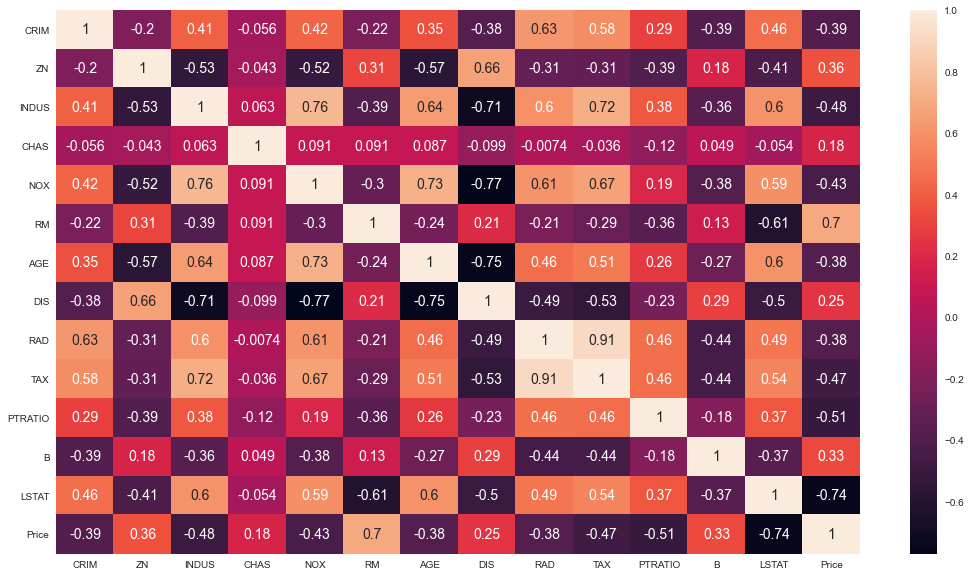

In [14]:
fig,ax = plt.subplots(figsize=(18,10))
sns.heatmap(corrmat, annot=True, annot_kws={'size':14})

In [16]:
corrmat.index

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [22]:
abs(corrmat['Price'])>0.5

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM          True
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO     True
B          False
LSTAT       True
Price       True
Name: Price, dtype: bool


C:\ProgramData\Anaconda3\lib\site-packages\IPython\lib\pretty.py:700: UserWarning:
Unexpected error in rendering Lux widget and recommendations. Falling back to Pandas display.

Please report this issue on Github: https://github.com/lux-org/lux/issues 


In [23]:
def getCorrelatedFeature(corrdata, th):
    selected_features = []
    value = []
    
    for i, col in enumerate(corrdata.index):
        if abs(corrdata[col])>th:
            selected_features.append(col)
            value.append(corrdata[col])
            
    df = pd.DataFrame(data=value, index=selected_features, columns = ['Corr Value'])
    
    return df

In [25]:
getCorrelatedFeature(corrmat['Price'], 0.5)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [30]:
corr_value = corrmat[abs(corrmat['Price'])>0.5][['Price']]
corr_value

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [31]:
corr_value.index

Index(['RM', 'PTRATIO', 'LSTAT', 'Price'], dtype='object')

In [34]:
correlated_data = boston[corr_value.index]
correlated_data.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

<AxesSubplot:>

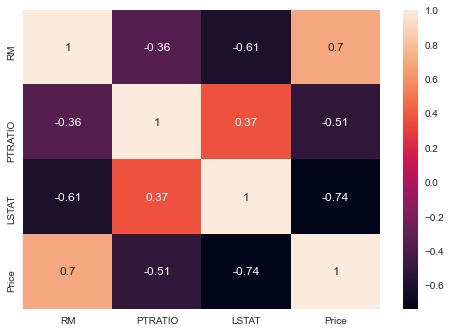

In [35]:
sns.heatmap(correlated_data.corr(), annot=True)

## Model Performance Evaluation 

In [36]:
list(correlated_data.columns)

['RM', 'PTRATIO', 'LSTAT', 'Price']

In [37]:
selected_features = ['RM', 'PTRATIO', 'LSTAT']

Outliers Removal Selected
Transformations Selected


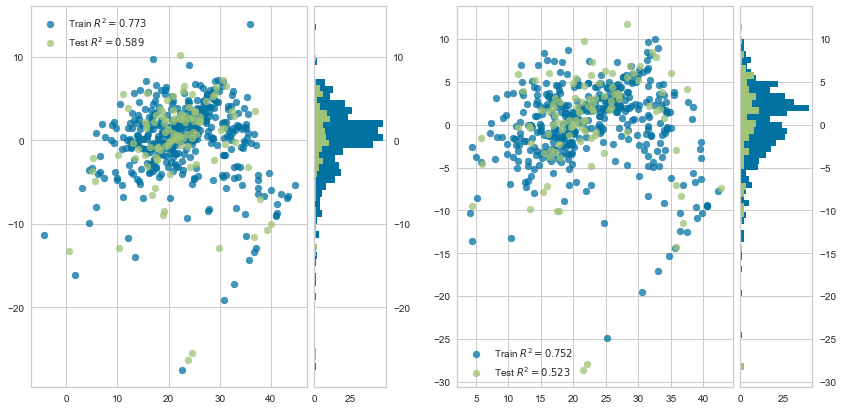

In [40]:
def run_Outliers_Transformations_Linear_Regression(df, cols, outliers=True, transformations=True):
    fig,ax = plt.subplots(ncols=2, figsize=(14,7))
    
    #reference plot
    X_train, X_test, y_train, y_test = train_test_split(boston[features], boston['Price'],
                test_size=0.2,
                random_state=0)
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    visualizer = ResidualsPlot(model, ax=ax[0])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    plt.legend()
  

    #Residuals Plot with Selected Features and Removed Outliers and Yeo-Johnson Transformation
    X_train, X_test, y_train, y_test = train_test_split(df, boston['Price'],
                test_size=0.2,
                random_state=0)
    
    #outliers removal
    if outliers == True:
        print('Outliers Removal Selected')
        winsorizer = Winsorizer(distribution='skewed',
                           tail='both',
                           fold=1.5,
                           variables=cols)

        X_train = winsorizer.fit_transform(X_train)
        X_test = winsorizer.transform(X_test)
    
    #transformations
    if transformations==True:
        print('Transformations Selected')
        transformer = PowerTransformer(method='yeo-johnson', standardize=True)
        X_train = transformer.fit_transform(X_train)
        X_test = transformer.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    visualizer = ResidualsPlot(model, ax=ax[1])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    plt.legend()

    
run_Outliers_Transformations_Linear_Regression(boston[selected_features], selected_features)

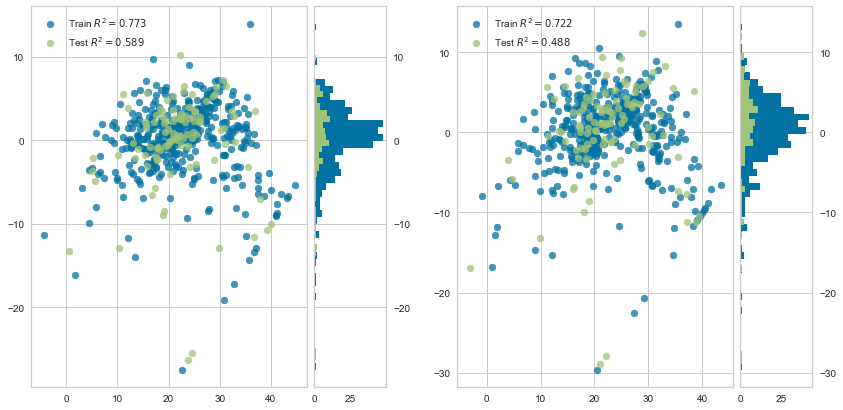

In [44]:
run_Outliers_Transformations_Linear_Regression(boston[selected_features],
                                               selected_features,
                                              outliers=False,
                                              transformations=False)

Outliers Removal Selected


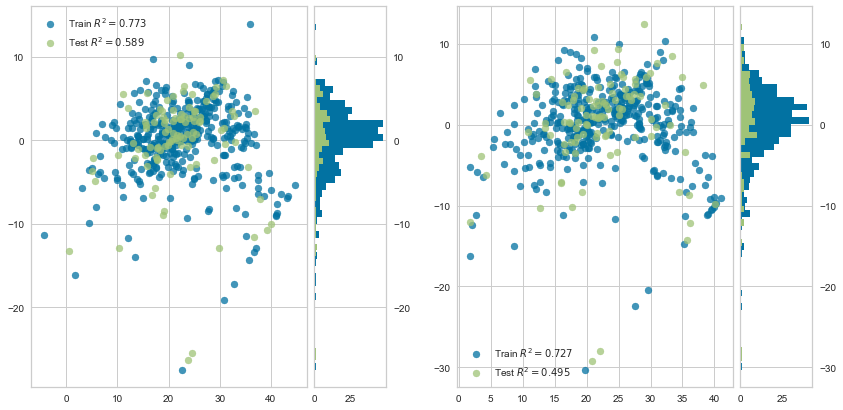

In [45]:
run_Outliers_Transformations_Linear_Regression(boston[selected_features],
                                               selected_features,
                                              outliers=True,
                                              transformations=False)

## Remove Correlated Input Features (Multicollinearity) 

<AxesSubplot:>

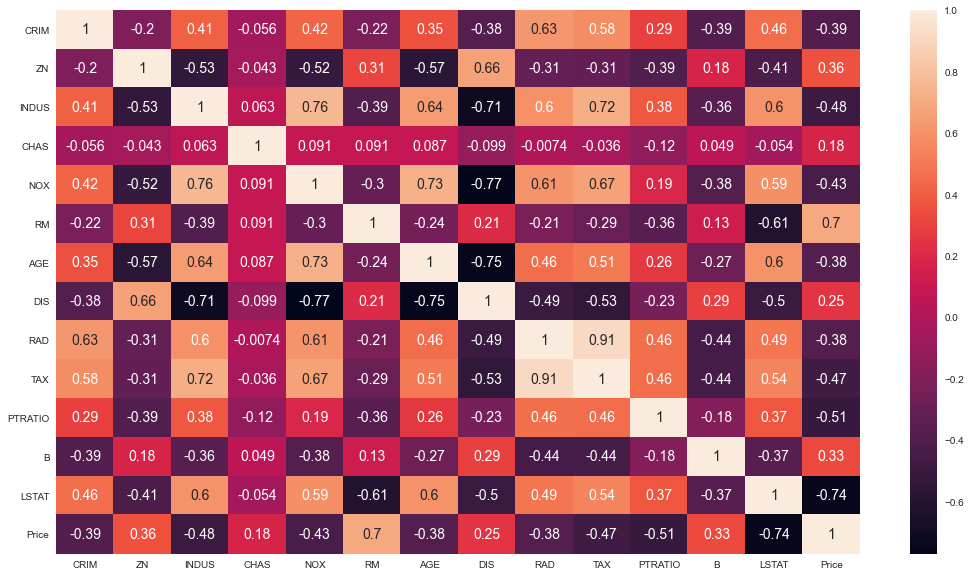

In [46]:
fig,ax = plt.subplots(figsize=(18,10))
sns.heatmap(corrmat, annot=True, annot_kws={'size':14})

In [48]:
print(features)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [50]:
def correlation(data, th):
    col_corr = set()
    
    corr_matrix = data.corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>th:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
                
    return col_corr

In [59]:
corr_features = correlation(boston, 0.8)
corr_features

{'TAX'}

In [61]:
selected_features = list(set(features)-corr_features)
print(selected_features)

['ZN', 'NOX', 'CHAS', 'AGE', 'CRIM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT', 'INDUS', 'RM', 'B']


Outliers Removal Selected
Transformations Selected


C:\Users\laxmi\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\_data.py:2995: RuntimeWarning:divide by zero encountered in log


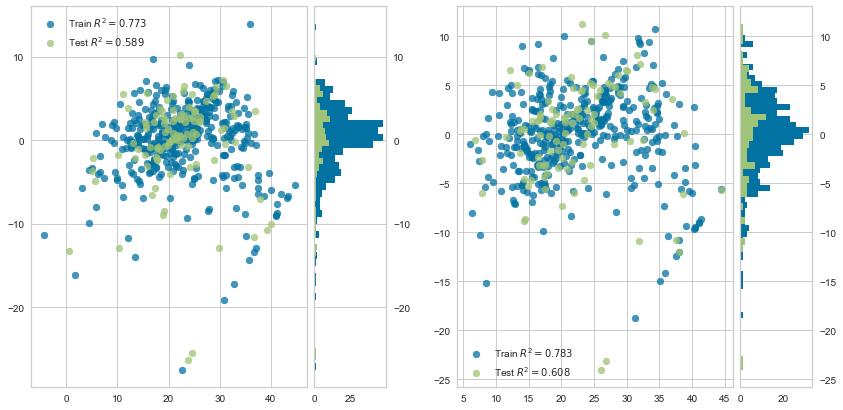

In [62]:
run_Outliers_Transformations_Linear_Regression(boston[selected_features],
                                               selected_features,
                                              outliers=True,
                                              transformations=True)

Outliers Removal Selected
Transformations Selected


C:\Users\laxmi\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\_data.py:2995: RuntimeWarning:divide by zero encountered in log


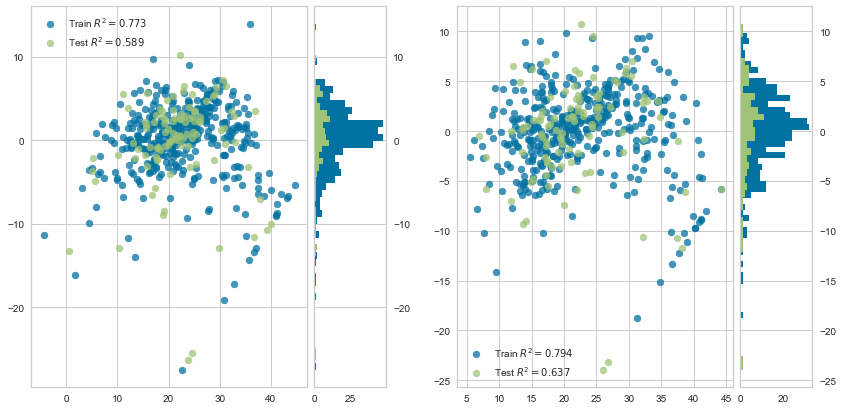

In [63]:
run_Outliers_Transformations_Linear_Regression(boston[features],
                                               features,
                                              outliers=True,
                                              transformations=True)

## Recursive Feature Elimination (RFE) 

The Recursive Feature Elimination (RFE) method works by recursively removing attributes and building a model on those attributes that remain. 

The RFE method takes the model to be used and the number of required features as input. It then gives the ranking of all the variables, 1 being most important. It also gives its support, True being relevant feature and False being irrelevant feature.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. 

First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a `coef_` attribute or through a `feature_importances_` attribute. 

Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

**Feature Selection for Machine Learning Playlist**

https://www.youtube.com/watch?v=pjxTdesnnDY&list=PLc2rvfiptPSQYzmDIFuq2PqN2n28ZjxDH

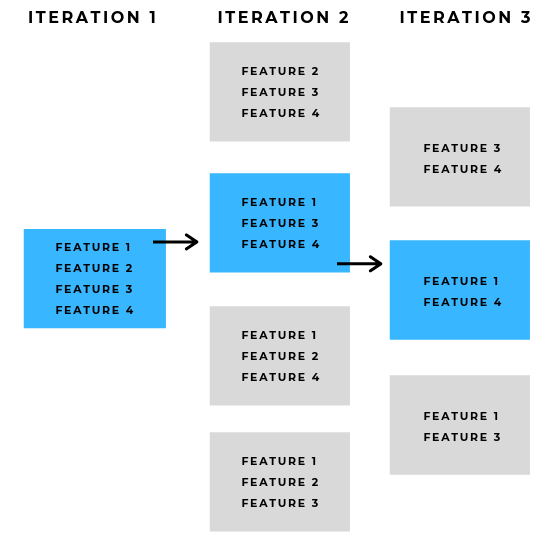

In [64]:
from sklearn.feature_selection import RFE

In [65]:
X_train, X_test, y_train, y_test = train_test_split(boston[features],
                boston['Price'],
                test_size=0.2,
                random_state=0)

In [66]:
model = LinearRegression()

selector = RFE(model, n_features_to_select=5, step=1)
selector.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [67]:
selector.support_

array([False, False, False,  True,  True,  True, False,  True, False,
       False,  True, False, False])

In [71]:
X_train.columns[selector.support_]

Index(['CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO'], dtype='object')

In [72]:
selector.n_features_

5

In [73]:
selector.ranking_

array([3, 5, 8, 1, 1, 1, 9, 1, 4, 6, 1, 7, 2])

In [74]:
print(features)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [75]:
pd.Series(selector.ranking_, features)

CRIM       3
ZN         5
INDUS      8
CHAS       1
NOX        1
RM         1
AGE        9
DIS        1
RAD        4
TAX        6
PTRATIO    1
B          7
LSTAT      2
dtype: int32

In [76]:
selected_features = list(X_train.columns[selector.support_])
selected_features

['CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO']

Outliers Removal Selected
Transformations Selected


C:\Users\laxmi\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\_data.py:2995: RuntimeWarning:divide by zero encountered in log


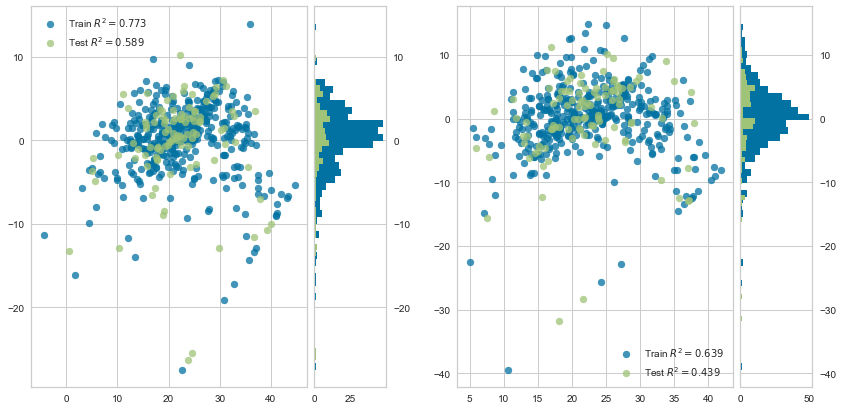

In [77]:
run_Outliers_Transformations_Linear_Regression(boston[selected_features], selected_features)

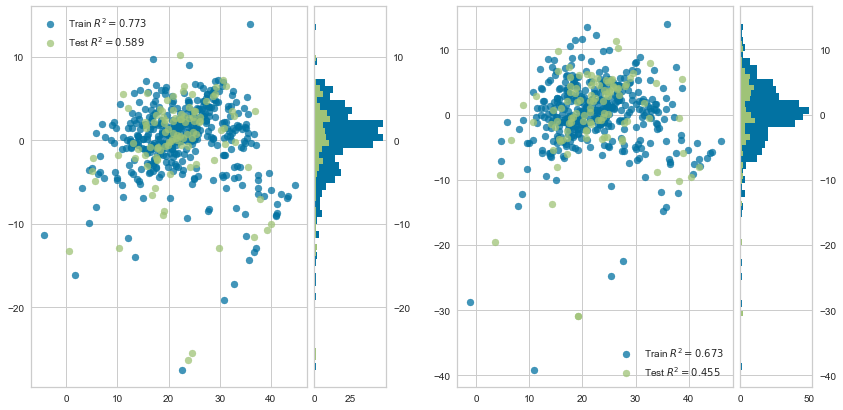

In [80]:
run_Outliers_Transformations_Linear_Regression(boston[selected_features], selected_features,
                                              outliers=False, transformations=False)

## Increamental RFE 

In [89]:
def increamental_RFE(n_features_to_select):
    X_train, X_test, y_train, y_test = train_test_split(boston[features],
                    boston['Price'],
                    test_size=0.2,
                    random_state=0)

    model = LinearRegression()

    selector = RFE(model, n_features_to_select=n_features_to_select, step=1)
    selector.fit(X_train, y_train)

    selected_features = list(X_train.columns[selector.support_])
    print('Selected Features for Training: ', selected_features)
    
    run_Outliers_Transformations_Linear_Regression(boston[selected_features], selected_features,
                                              outliers=False, transformations=True)

Selected Features for Training:  ['NOX']
Transformations Selected


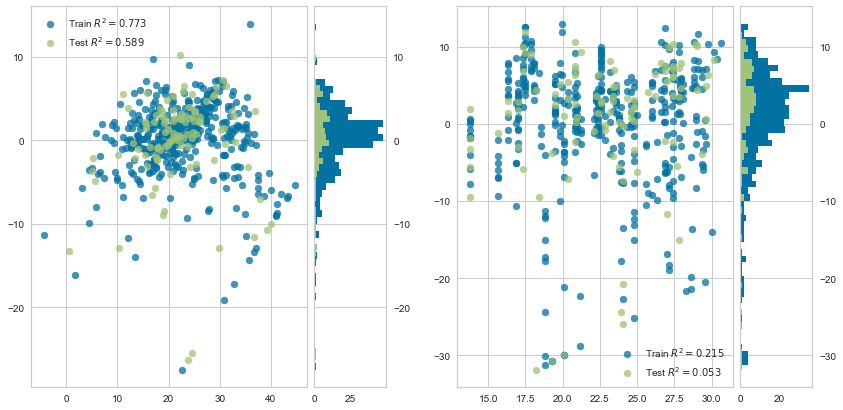




Selected Features for Training:  ['NOX', 'RM']
Transformations Selected


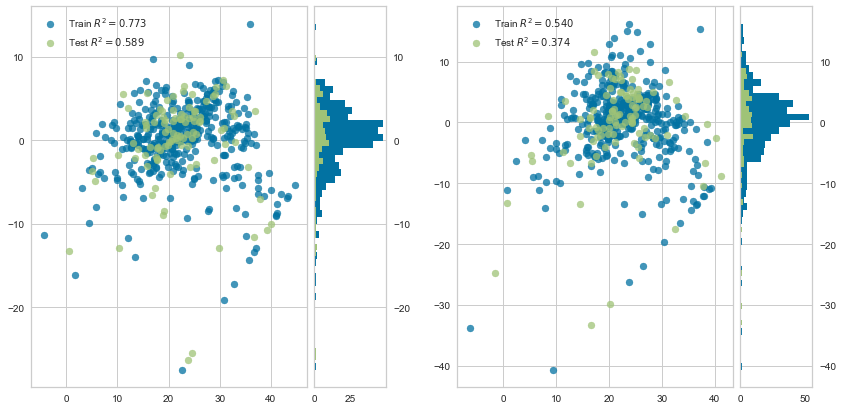




Selected Features for Training:  ['CHAS', 'NOX', 'RM']
Transformations Selected


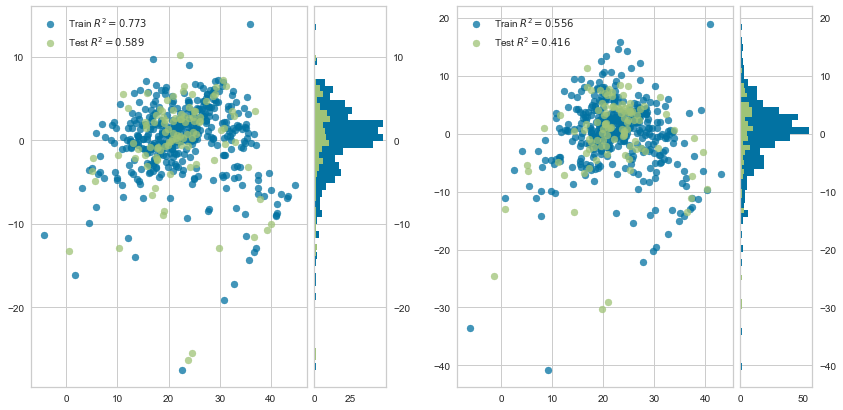




Selected Features for Training:  ['CHAS', 'NOX', 'RM', 'PTRATIO']
Transformations Selected


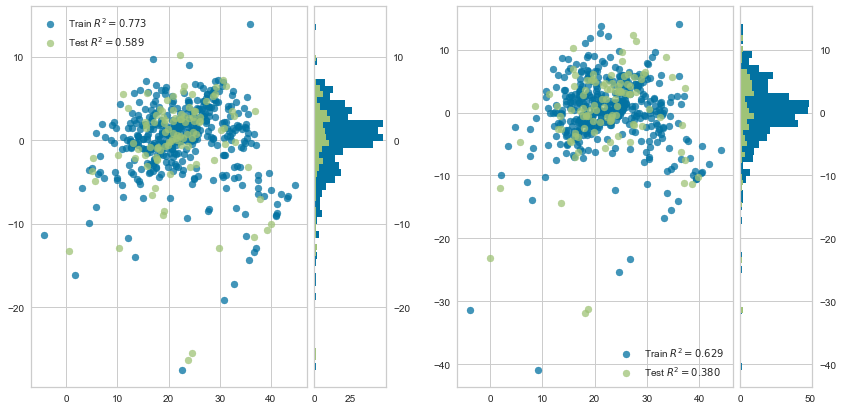




Selected Features for Training:  ['CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO']
Transformations Selected


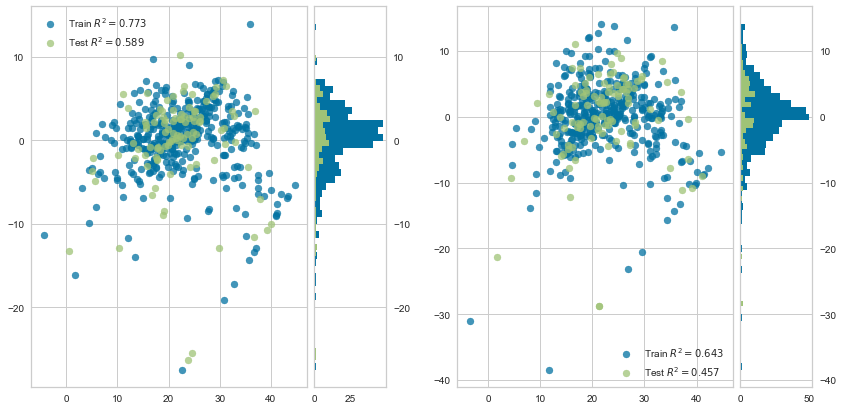




Selected Features for Training:  ['CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT']
Transformations Selected


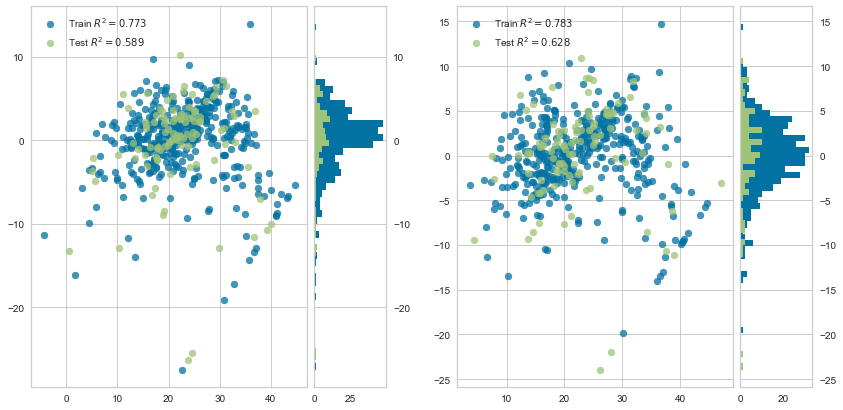




Selected Features for Training:  ['CRIM', 'CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT']
Transformations Selected


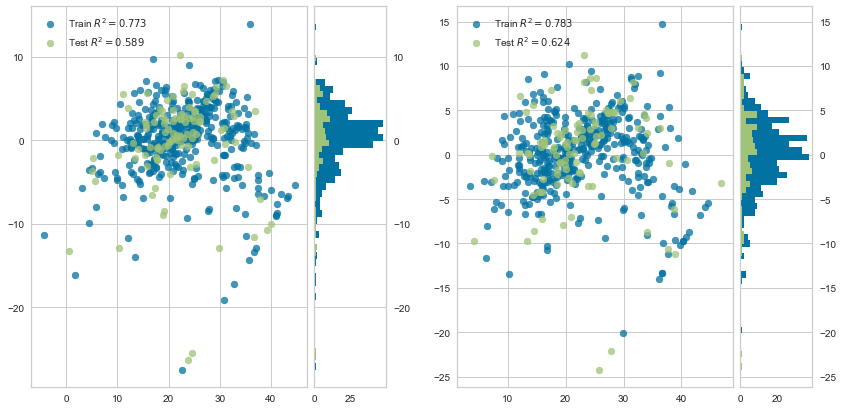




Selected Features for Training:  ['CRIM', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT']
Transformations Selected


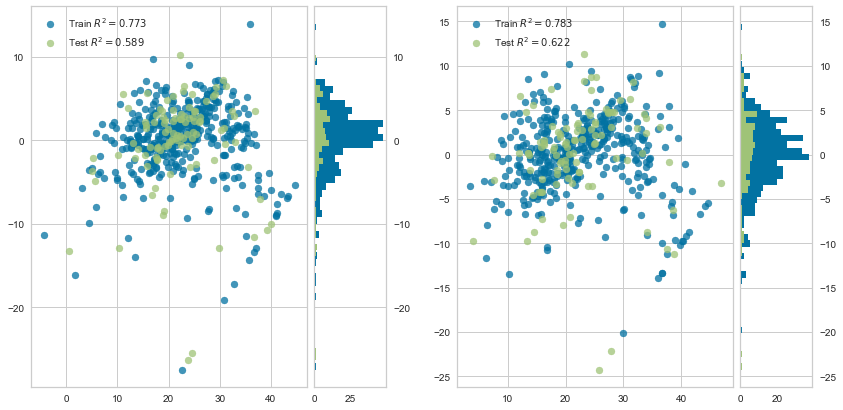




Selected Features for Training:  ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT']
Transformations Selected


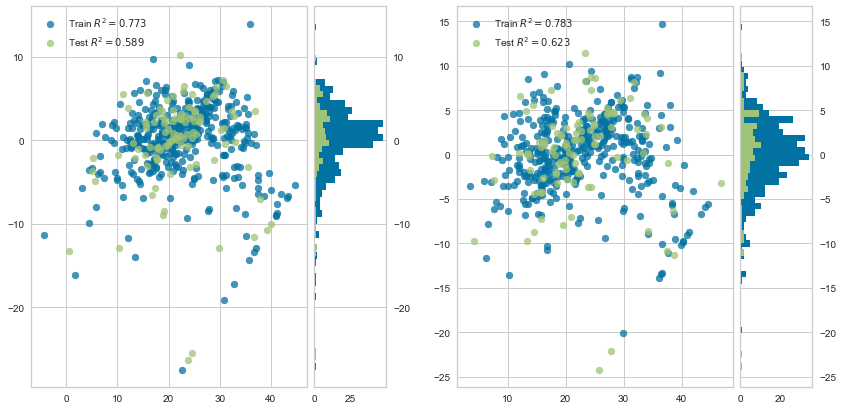




Selected Features for Training:  ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
Transformations Selected


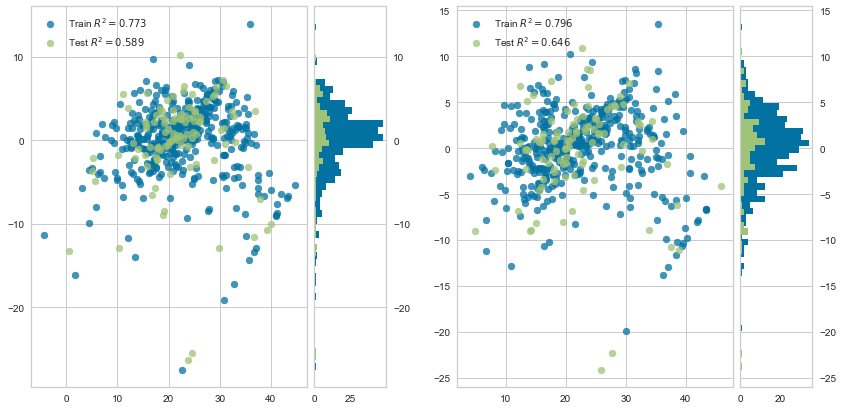




Selected Features for Training:  ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
Transformations Selected


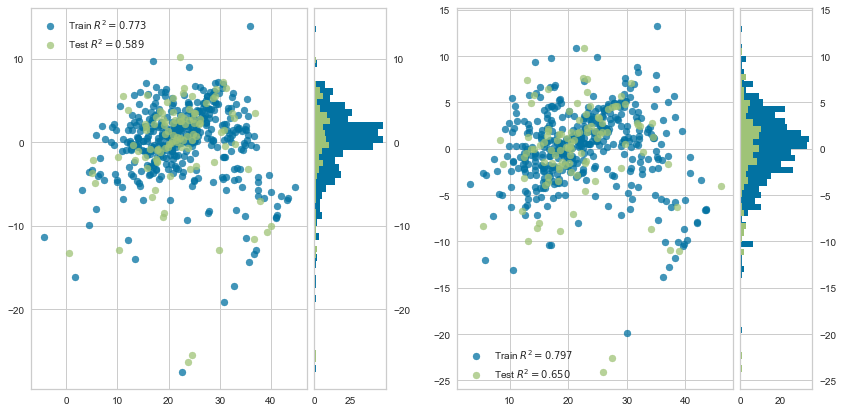




Selected Features for Training:  ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
Transformations Selected


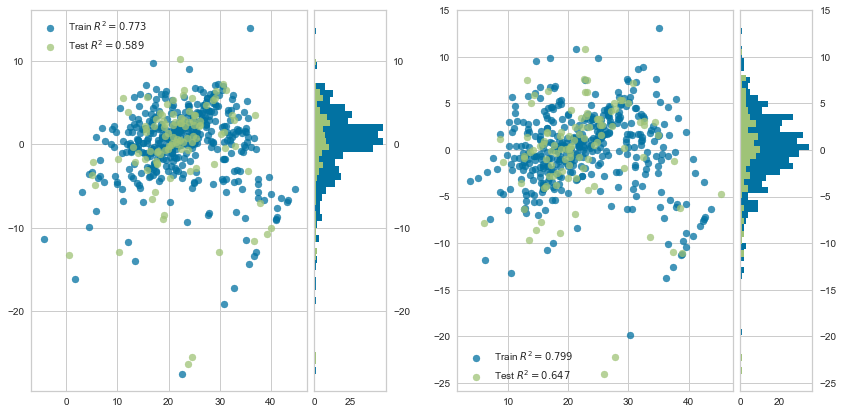




Selected Features for Training:  ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
Transformations Selected


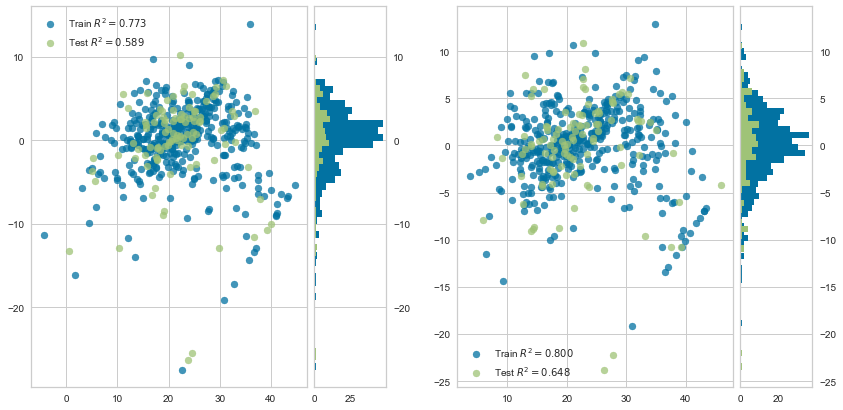

In [90]:
for i in range(1, len(features)+1):
    increamental_RFE(i)
    
    plt.show()
    print('\n\n')

## Exhaustive Feature Selection (EFS)

This is a brute-force evaluation of each feature subset meaning that it tries every possible combination of features and chooses the best performing model. 

http://rasbt.github.io/mlxtend/

In [1]:
2**36

68719476736

In [96]:
# !pip install mlxtend

In [97]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [99]:
X_train, X_test, y_train, y_test = train_test_split(boston[features],
                    boston['Price'],
                    test_size=0.2,
                    random_state=0)

model = LinearRegression()

selector = EFS(model,
              min_features=7,
              max_features=12,
              scoring='r2',
              print_progress=False,
              cv=2)

selector.fit(X_train, y_train)

ExhaustiveFeatureSelector(cv=2, estimator=LinearRegression(), max_features=12,
                          min_features=7, print_progress=False, scoring='r2')

In [100]:
selector.best_idx_

(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)

In [101]:
selector.best_feature_names_

('CRIM', 'ZN', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')

In [102]:
selector.best_score_

0.749180736486603

Selected Features for Training:  ['CRIM', 'ZN', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
Transformations Selected


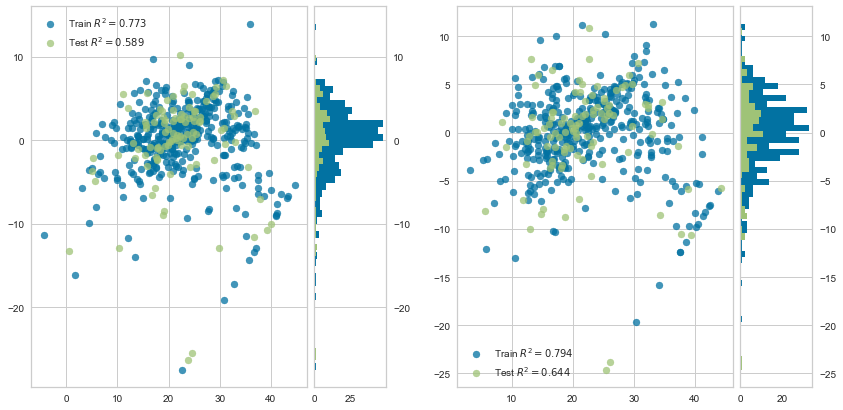

In [103]:
selected_features = list(selector.best_feature_names_)
print('Selected Features for Training: ', selected_features)

run_Outliers_Transformations_Linear_Regression(boston[selected_features], selected_features,
                                              outliers=False, transformations=True)

## Feature Selection by Linear Regression Coefficients 

In [104]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(boston[features],
                    boston['Price'],
                    test_size=0.2,
                    random_state=0)

In [105]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [106]:
selector = SelectFromModel(LinearRegression())

selector.fit(X_train, y_train)

SelectFromModel(estimator=LinearRegression())

In [107]:
selector.get_support()

array([False, False, False, False,  True,  True, False,  True,  True,
        True,  True, False,  True])

In [119]:
selected_features = boston[features].columns[selector.get_support()]
selected_features

Index(['NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')

In [120]:
coeff = selector.estimator_.coef_
coeff

array([-0.97082019,  1.05714873,  0.03831099,  0.59450642, -1.8551476 ,
        2.57321942, -0.08761547, -2.88094259,  2.11224542, -1.87533131,
       -2.29276735,  0.71817947, -3.59245482])

In [118]:
s = pd.Series(selector.estimator_.coef_, features)
s

CRIM      -0.970820
ZN         1.057149
INDUS      0.038311
CHAS       0.594506
NOX       -1.855148
RM         2.573219
AGE       -0.087615
DIS       -2.880943
RAD        2.112245
TAX       -1.875331
PTRATIO   -2.292767
B          0.718179
LSTAT     -3.592455
dtype: float64

<BarContainer object of 13 artists>

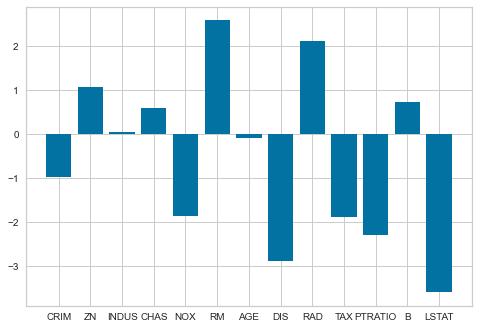

In [121]:
plt.bar(features, coeff)

In [122]:
print(selected_features)

Index(['NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')


In [124]:
abs(s).mean()

1.5883607524877599

In [125]:
s[abs(s)>1.58]

NOX       -1.855148
RM         2.573219
DIS       -2.880943
RAD        2.112245
TAX       -1.875331
PTRATIO   -2.292767
LSTAT     -3.592455
dtype: float64

In [127]:
selected_features

Index(['NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')

Outliers Removal Selected
Transformations Selected


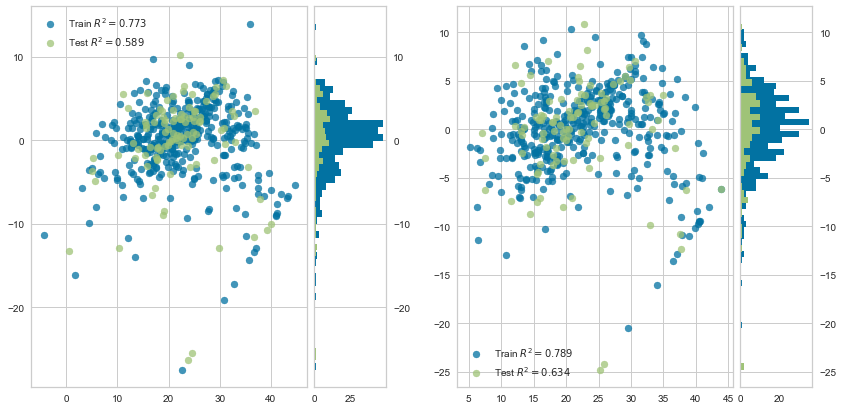

In [128]:
run_Outliers_Transformations_Linear_Regression(boston[selected_features], list(selected_features))